### Trabajando con números complejos

Quiero ver como podemos usar los complejos en numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn 
#import sympy as sp no lo usaremos por ahora

f = lambda z: z**2 - 1


#eje_real = np.linspace(-1, 1, 100)
#eje_lateral = np.linspace(-1, 1, 100)
#
#X, Y = np.meshgrid(eje_real, eje_lateral)
#
#plt.contourf(X, Y, f(X,Y), cmap='jet')
#plt.colorbar()
#plt.show()

### Método de Newton Raphson aplicado a los complejos

Nuestro punto inicial será un número complejo. Al iterar con la formula nos acercaremos a una raiz. La fórmula que usaremos será: 
$$z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}$$

In [2]:
# Una función y su derivada
#f = lambda z: z**4 - z

f = lambda z: np.sin(z)

def f_prime(z, h=0.0001): 
    return (f(z+h)-f(z))/h

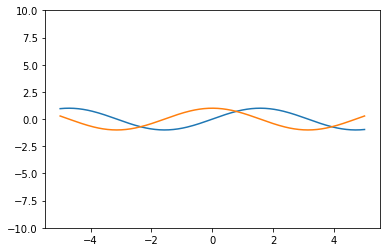

In [3]:
# Comprobamos que funciona
x = np.linspace(-5, 5, 200)
plt.plot(x, f(x), x, f_prime(x))
plt.ylim(-10, 10)
plt.show()

In [4]:
# Acepta f complejos?
f(1+1j)

(1.2984575814159773+0.6349639147847361j)

In [6]:
# Sin redondeos y con unico valor inicial
x_i = 3 # Esto es un valor aleatorio. 
           # Dependiendo de la función no puede ser cero o dará un error de Not A Number. Se debe hacer una gestión de eso
error_dado = float(input("Introduce el error: \n")) # Tolerancia
error_calculado = 1.0
i = 0
while error_dado <= error_calculado:
    x_siguiente = x_i - f(x_i)/f_prime(x_i)
    print(f"x_siguiente: {x_siguiente} \n")
    print(f"x_i: {x_i} \n")
    error_calculado = abs((x_siguiente - x_i))
    print(f"Valor del error: {error_calculado} \n")
    x_i = x_siguiente
    i += 1
    if i == 10000: # Failswich para que no se produzca un bucle infinito en caso de que no converga
        print("El bucle se ha ejecutado 10000 veces, saliendo de él")
        break
print(f"La aproximación a una de las raices de la función es {x_siguiente} ({i} iteraciones)") # Nota: se podría poner el resultado redondeada

Introduce el error: 
 0.001


x_siguiente: 3.1425455273429423 

x_i: 3 

Valor del error: 0.14254552734294235 

x_siguiente: 3.1415926532544156 

x_i: 3.1425455273429423 

Valor del error: 0.0009528740885267339 

La aproximación a una de las raices de la función es 3.1415926532544156 (2 iteraciones)


Calcularé las raices n-esimas de la unidad numéricamente. Introduce n (el exponente de la ecuación z**n = 1):  10


Las raices n-ésimas son: [(1+0j), (0.809016994374948+0.587785252292473j), (0.309016994374947+0.951056516295154j), (-0.309016994374947+0.951056516295154j), (-0.809016994374947+0.587785252292473j), (-1+0j), (-0.809016994374948-0.587785252292473j), (-0.309016994374948-0.951056516295154j), (0.309016994374947-0.951056516295154j), (0.809016994374947-0.587785252292473j)]


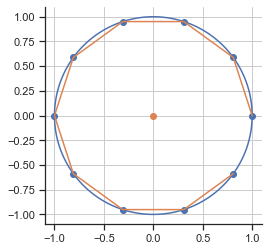

In [7]:
# Creamos una función que calcule las raices de la unidad
def raices_n_esimas(n):
    """
    Las raices n-esimas de la unidad, utilizando la forma exponencial
    """
    raices = list()
    for k in range(0, n, 1): # De cero a n-1
        raiz = np.exp((2*1j*np.pi*k)/(n)) # La calculamos 
        raiz = round(raiz, 15) # La redondeamos
        raices.append(raiz)
    return raices
n = int(input("Calcularé las raices n-esimas de la unidad numéricamente. Introduce n (el exponente de la ecuación z**n = 1): "))
print(f"Las raices n-ésimas son: {raices_n_esimas(n)}")

raices_x = np.real(raices_n_esimas(n)) # lo que estará en el eje x es simplemente la parte real
raices_y = np.imag(raices_n_esimas(n)) # Lo que estará en el eje y es la parte imaginaria

# Hacemos la circunferencia unitaria
angulos = np.linspace(0, 2*np.pi, 150) 
# El radio es uno por lo que no hace falta ponerlo
circ_x = np.cos(angulos) 
circ_y = np.sin(angulos)

"""plt.scatter(x, y)
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)
plt.show()"""

seaborn.set(style='ticks')

fig, ax = plt.subplots()
ax.scatter(raices_x, raices_y)
ax.scatter(0, 0)
ax.plot(circ_x, circ_y)
ax.plot(raices_x, raices_y)
ax.set_aspect('equal')
ax.grid(True, which='both')
# Falta ponerle los nómbres a los ejes
seaborn.despine(ax=ax, offset=0) # the important part here. Copiado de https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot

### Conclusión

Existe una pequeña cantidad de error por el redondeo, por lo que valores muy grandes de $n$ no caen perfectamente en la circunferencia unitaria

In [8]:
# Redefinimos la función para tenerla más cerca
f = lambda z: z**3 - z**2 - 1

def f_prime(z, h=0.0001): 
    return (f(z+h)-f(z))/h

In [9]:
# Múltiples valores iniciales que estén en la circunferencia unitaria y sus múltiplos
valores_iniciales = raices_n_esimas(10)

error_dado = float(input("Introduce el error (Las raíces finales serán redondeadas en función del error dictado, Ej: error=0.0001 -> redondeo hasta la cuarta unidad): \n"))
error_calculado = 1.0
raices = list() 

for i in valores_iniciales: 
    x_i = i
    cont = 0
    while error_dado <= error_calculado:
        x_siguiente = x_i - f(x_i)/f_prime(x_i)
        #print(f"x_siguiente: {x_siguiente} \n")
        #print(f"x_i: {x_i} \n")
        error_calculado = abs((x_siguiente - x_i))
        #print(f"Valor del error: {error_calculado} \n")
        x_i = x_siguiente
        cont += 1
        if cont == 10000: # Failswich para que no se produzca un bucle infinito en caso de que no converga
            print("El bucle se ha ejecutado 10000 veces, saliendo de él")
            break
    error_calculado = 1.0
    #print(f"La aproximación a una de las raices de la función es {x_siguiente} ({cont} iteraciones)") 
    raices.append(x_siguiente)
#print(f"En resumen, las raices encontradas son: {raices}")

for i in range(len(valores_iniciales)): # Esta parte se encaragará de hacer el redondeamiento
    raices[i] = round(raices[i], int(np.log10(error_dado**(-1))))
raices_set = set(raices)# Elimina duplicados
print(f"Las raices redondeadas en función del error dado y eliminando duplicados obvios: {raices_set}")

Introduce el error (Las raíces finales serán redondeadas en función del error dictado, Ej: error=0.0001 -> redondeo hasta la cuarta unidad): 
 0.001


Las raices redondeadas en función del error dado y eliminando duplicados obvios: {(-0.233+0.793j), (1.466+0j), (-0.233-0.793j)}


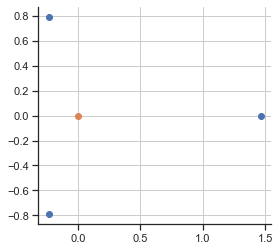

In [10]:
# Representamos las raices
raices_lista_redondeada = list(raices_set)
raices_x = np.real(raices_lista_redondeada) # lo que estará en el eje x es simplemente la parte real
raices_y = np.imag(raices_lista_redondeada) # Lo que estará en el eje y es la parte imaginaria

seaborn.set(style='ticks')

fig, ax = plt.subplots()
ax.scatter(raices_x, raices_y)
ax.scatter(0, 0)
ax.set_aspect('equal')
ax.grid(True, which='both')
# Falta ponerle los nómbres a los ejes
seaborn.despine(ax=ax, offset=0)

### Mirar:

https://seaborn.pydata.org/tutorial.html

### Problemas

Para poder representar todo esto de forma visual tenemos que:

1 - Hacer una matriz de nxn llena de posibles puntos con:
    
    eje_real = np.linspace(-1, 1, 100)
    eje_lateral = np.linspace(-1, 1, 100)

    X, Y = np.meshgrid(eje_real, eje_lateral)
   
2 - Obtener las raices de la función y asignarles un color, Esto se podría hacer con un diccionario. 

3 - Pasar esos cada uno de esos puntos por una versión del método que nos diga a que raiz converja. 

Así tendremos que cada punto tiene asignado una raiz y por lo tanto un color. Lo último sería pintar que colores salen en que partes del plano utilizando una función que todavía no conozco y tengo que buscar. Lo que podemos hacer es crear una clase para las funciones. Así tendríamos sistemáticamente datos como su grado (que es igual al número de raices), un método para calcular todas las raices con el método de newton (ver celda 59), un método para probar un valor determminado (ver celda 8)y podemos almacenar los colores que vamos a usar. 

Para las clases: https://www.w3schools.com/python/python_classes.asp

In [68]:
class f_compleja:
    """
    Clase para funciones complejas en forma de sentencias lambda. Esta clase ofrece el método de newton para encontrar raices,
    un método para encontrar la derivada, probar si un punto converge a una raiz con el método de newton
    """
    def __init__(self, func_lambda):
        """
        Función inicializadora de la clase
        """
        self.func_lambda = func_lambda
    def derivada(self, z, h=0.0001): # Se llamará como: f_compleja.derivada()
        """
        Función que calcula la derivada numericamente
        """
        return (self.func_lambda(z+h)-self.func_lambda(z))/h
    def raices(self, error_dado=0.001):
        """
        Encuentra las raices de la función por el método de newton. Empieza con las raices unitarias de 10
        """
        valores_iniciales = raices_n_esimas(10)

        error_calculado = 1.0
        raices = list() 

        for i in valores_iniciales: 
            x_i = i
            cont = 0
            while error_dado <= error_calculado or cont != 10000:
                x_siguiente = x_i - self.func_lambda(x_i)/self.derivada(x_i)
                error_calculado = abs((x_siguiente - x_i))
                x_i = x_siguiente
                cont += 1
            error_calculado = 1.0
            raices.append(x_siguiente)
        for i in range(len(valores_iniciales)): # Esta parte se encaragará de hacer el redondeamiento
            raices[i] = np.round_(raices[i], int(np.log10(error_dado**(-1))))
        raices_set = set(raices)# Elimina duplicados
        return raices_set
    
    def intentar_punto(self, z, error_dado=0.001):
        """
        Con el punto "z" dado comienza una iteración del método de newton. 
        """
        cont = 0
        error_calculado = 1.0
        x_i = z
        while error_dado <= error_calculado or cont != 10000:
            x_siguiente = x_i - self.func_lambda(x_i)/self.derivada(x_i)
            error_calculado = abs((x_siguiente - x_i))
            x_i = x_siguiente
            cont += 1
        error_calculado = 1.0
        return np.round_(x_siguiente, int(np.log10(error_dado**(-1))))
    
    def intentar_array(self, z_array, error_dado=0.001):
        """
        Para una array de arrays
        """
        print(z_array.shape)
        error_calculado = 1.0
        raices = np.zeros(z_array.shape)
        cont2 = 0
        for j in z_array:
            print(j)
            for i in j: 
                print(i)
                x_i = i
                cont = 0
                while error_dado <= error_calculado or cont != 10:
                    x_siguiente = x_i - self.func_lambda(x_i)/self.derivada(x_i)
                    error_calculado = abs((x_siguiente - x_i))
                    x_i = x_siguiente
                    cont += 1
                error_calculado = 1.0
                raices[cont2, cont] = x_siguiente
            #for i in range(len(valores_iniciales)): # Esta parte se encaragará de hacer el redondeamiento
            #    raices[i] = np.round_(raices[i], int(np.log10(error_dado**(-1))))
            cont2 += 1
        return raices

In [69]:
g = f_compleja(lambda z: z**3 - z**2 - 1)

In [70]:
g.raices()

{(-0.233-0.793j), (-0.233+0.793j), (1.466+0j)}

In [71]:
# Redefinimos la función para tenerla más cerca
f = lambda z: z**3 - z**2 - 1

def f_prime(z, h=0.0001): 
    return (f(z+h)-f(z))/h

z_array = np.array([-1, 0.01, 1],
                   [])

error_calculado = 1.0
raices = np.zeros(z_array.shape)
cont2 = 0
for j in z_array:
    print(j)
    for i in j: 
        print(i)
        x_i = i
        cont = 0
        while error_dado <= error_calculado or cont != 10:
            x_siguiente = x_i - f(x_i)/f_prime(x_i)
            error_calculado = abs((x_siguiente - x_i))
            x_i = x_siguiente
            cont += 1
        error_calculado = 1.0
        raices[cont2, cont] = x_siguiente
    #for i in range(len(valores_iniciales)): # Esta parte se encaragará de hacer el redondeamiento
    #    raices[i] = np.round_(raices[i], int(np.log10(error_dado**(-1))))
    cont2 += 1
print(raices)

()
()
()
[0. 0. 0.]


In [72]:
#This may be helpfull

f = f_compleja(lambda z: z**4 - 1)

raices = list(f.raices(0.1))

N = 50

A = np.linspace(-2, 2, N)
B = np.linspace(-2, 2, N)

A2, B2 = np.meshgrid(A, B)

Z = A2 + B2*1j
#plt.contourf(X, Y, np.abs(AGM(1, Z)))
#Z
raices

[(1+0j), -1j, 1j, (-1+0j)]

In [73]:
for i in range(N):
    for j in range(N):
        Z[i][j] = f.intentar_punto(Z[i][j], 0.01)
#Z

In [74]:
Z_bool = np.zeros((N, N))
Z_color = np.zeros((N, N))

cont = 0

for raiz in raices:
    Z_bool = (Z == raiz)
    for i in range(N):
        for j in range(N):
            if Z_bool[i][j]:
                Z_color[i][j] = cont
    cont += 1
Z_color

array([[0., 0., 0., ..., 3., 3., 2.],
       [2., 0., 0., ..., 3., 3., 2.],
       [2., 2., 0., ..., 2., 2., 2.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 3., 3., 1.],
       [0., 0., 0., ..., 3., 3., 1.]])

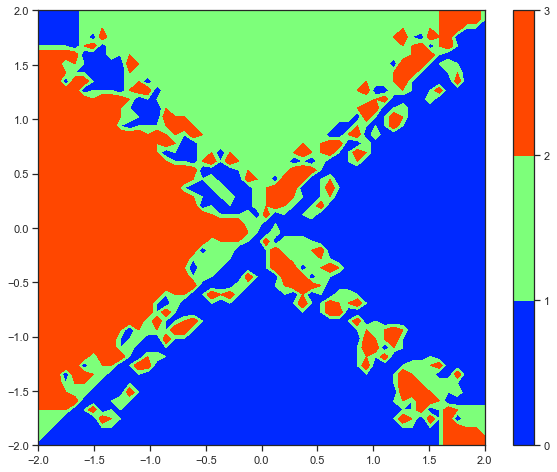

In [75]:
plt.figure(figsize=(10, 8))

plt.contourf(A2, B2, Z_color, 2, cmap='jet') # 30 is the amount of countours
plt.colorbar()
plt.show()

In [1]:
from numba import jit, complex64, float32
import numpy as np
import matplotlib.pyplot as plt

from time import time, sleep

In [12]:
A = np.array([0, 1])
B = A.reshape(-1, 1)

np.dot(B, A)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [13]:
@jit(complex64(complex64), nopython=True)
def f(z):
    return z**4 - 1

In [14]:
@jit(complex64(complex64), nopython=True)
def f_prime(z):
    return 4*z**3

In [15]:
@jit(nopython=True)
def intentar_punto(z, error_dado=0.001):
    """
    Con el punto "z" dado comienza una iteración del método de newton. 
    """
    cont = 0
    error_calculado = 1.0
    x_i = z
    while error_dado <= error_calculado:
        x_siguiente = x_i - f(x_i)/f_prime(x_i)
        error_calculado = abs((x_siguiente - x_i))
        x_i = x_siguiente
        cont += 1
        if cont == 100:
            return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont
    error_calculado = 1.0
    return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont

In [16]:
intentar_punto(0.01+0.01j)

((10.909+10.909j), 100)

In [17]:
raices = (1+0j, -1+0j, 1j, -1j)

N = 5000

#A = np.linspace(-2, 2, N)
#B = np.linspace(-2, 2, N)

A = np.linspace(-1, 1, N)
B = np.linspace(-1, 1, N)

A2, B2 = np.meshgrid(A, B)

Z = A2 + B2*1j
#plt.contourf(X, Y, np.abs(AGM(1, Z)))
#Z
raices

((1+0j), (-1+0j), 1j, (-0-1j))

In [18]:
start = time()

for i in range(N):
    for j in range(N):
        Z[i][j] = intentar_punto(Z[i][j], 0.01)[0]
        
print(f"Tiempo de ejecución {round(time() - start, 2)}")

Tiempo de ejecución 92.48


In [19]:
Z_bool = np.zeros((N, N))
Z_color = np.zeros((N, N))

cont = 0

for raiz in raices:
    Z_bool = (Z == raiz)
    for i in range(N):
        for j in range(N):
            if Z_bool[i][j]:
                Z_color[i][j] = cont
    cont += 1

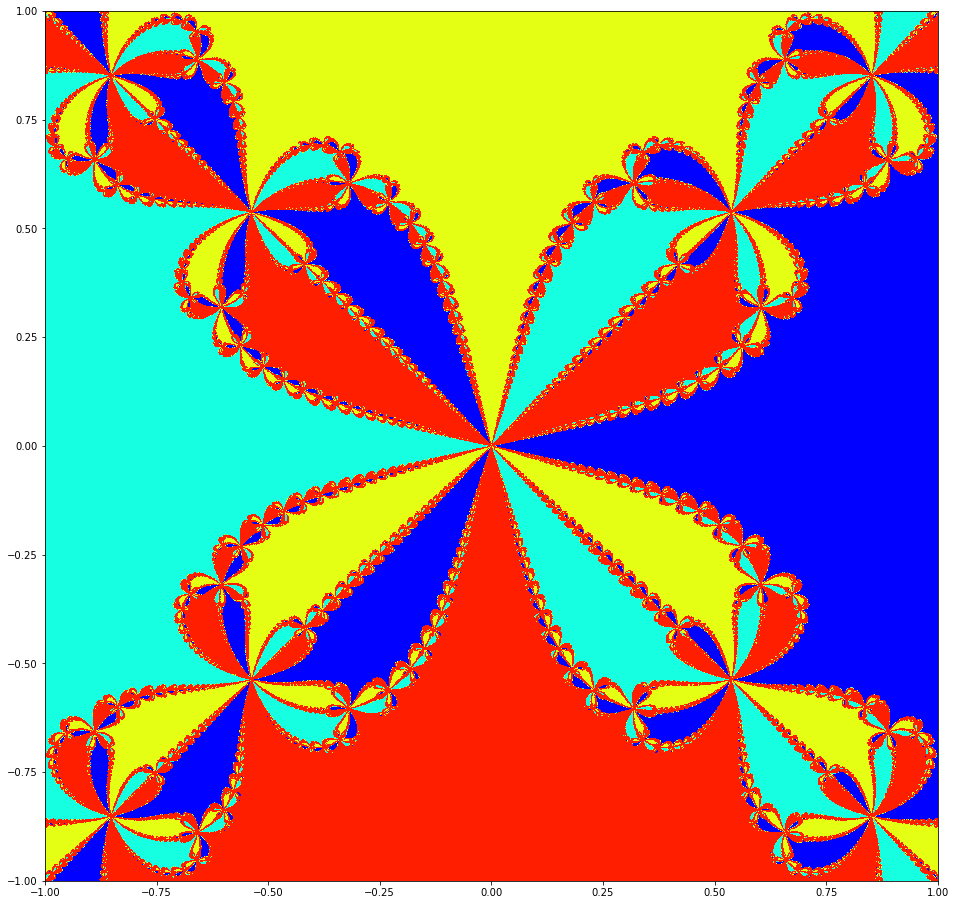

In [21]:
plt.figure(figsize=(16, 16))

plt.contourf(A2, B2, Z_color, len(raices)-1, cmap='jet') 
plt.show()

In [8]:
@jit(complex64(complex64), nopython=True)
def f(z):
    return np.sin(np.pi*z)

In [9]:
@jit(complex64(complex64), nopython=True)
def f_prime(z):
    return np.cos(np.pi*z)

In [6]:
@jit(nopython=True)
def intentar_punto(z, error_dado=0.001):
    """
    Con el punto "z" dado comienza una iteración del método de newton. 
    """
    cont = 0
    error_calculado = 1.0
    x_i = z
    while error_dado <= error_calculado:
        x_siguiente = x_i - f(x_i)/f_prime(x_i)
        error_calculado = abs((x_siguiente - x_i))
        x_i = x_siguiente
        cont += 1
        if cont == 100:
            return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont
    error_calculado = 1.0
    return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont

In [19]:
intentar_punto(1)

((1+0j), 1)

In [37]:
raices = np.array([0, 1+0j, -1+0j, -1-1j, -1+1j, 1-1j, 1+1j])

N = 5000

#A = np.linspace(-2, 2, N)
#B = np.linspace(-2, 2, N)

A = np.linspace(-1, 1, N)
B = np.linspace(-1, 1, N)

A2, B2 = np.meshgrid(A, B)

Z = A2 + B2*1j
#plt.contourf(X, Y, np.abs(AGM(1, Z)))
#Z
raices

array([ 0.+0.j,  1.+0.j, -1.+0.j, -1.-1.j, -1.+1.j,  1.-1.j,  1.+1.j])

In [12]:
start = time()

for i in range(N):
    for j in range(N):
        Z[i][j] = intentar_punto(Z[i][j], 0.01)[0]
        
print(f"Tiempo de ejecución {round(time() - start, 2)}")

Tiempo de ejecución 284.04


In [31]:
Z_bool = np.zeros((N, N))
Z_color = np.zeros((N, N))

cont = 1

for raiz in raices:
    Z_bool = (np.round(Z) == raiz) # Redondeo la matriz a el entero más cercano, ayuda a la computación
    for i in range(N):
        for j in range(N):
            if Z_bool[i][j]:
                Z_color[i][j] = cont
    cont += 1

In [ ]:
plt.figure(figsize=(16, 14))

plt.contourf(A2, B2, Z_color, len(raices), cmap='jet') # 30 is the amount of countours
plt.colorbar()
plt.scatter(raices.real, raices.imag, color="black")
plt.show()

In [26]:
from scipy.special import gamma, psi, rgamma #función gamma, función digamma y reciproco de la función gamma

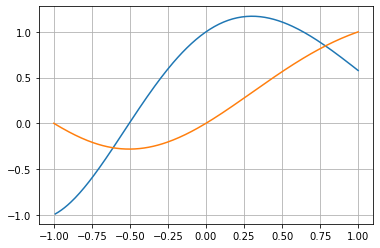

In [27]:
x = np.linspace(-1, 1, 200)
y = f_prime(x)

x1 = np.linspace(-1, 1, 200)
y1 = f(x)

plt.plot(x, y)
plt.plot(x1, y1)
plt.grid()
plt.show()

In [28]:
rgamma(53.929)
rgamma(34.055-4.519j)
rgamma(42) # Cuanto mayor es el argumento más se acerca a cero

2.989310827142436e-50

In [29]:
#@jit(complex64(complex64), nopython=True)
def f(z):
    return rgamma(z)

In [30]:
#@jit(complex64(complex64), nopython=True)
def f_prime(z):
    return -1*psi(z)*rgamma(z)

In [31]:
#@jit(nopython=True)
def intentar_punto(z, error_dado=0.001):
    """
    Con el punto "z" dado comienza una iteración del método de newton. 
    """
    cont = 0
    error_calculado = 1.0
    x_i = z
    while error_dado <= error_calculado:
        x_siguiente = x_i - f(x_i)/f_prime(x_i)
        error_calculado = abs((x_siguiente - x_i))
        #print(x_siguiente, abs((x_siguiente - x_i)))
        x_i = x_siguiente
        cont += 1
        #if round(f_prime(x_i)) == 0:
        #    return 41, cont
        if cont == 100:
            return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont
        if x_i >= 100:
            return 42, cont
    error_calculado = 1.0
    return np.round_(x_siguiente, int(np.log10(error_dado**(-1)))), cont

In [32]:
intentar_punto(-0.5) # Este punto acabaría dando como raiz +infinito, donde la función es cero

(53.929, 100)

In [44]:
raices = np.array([0+0j, -1+0j, -2+0j, -3+0j, -4+0j, -5+0j])

N = 2000

A = np.linspace(-2, 2, N)
B = np.linspace(-2, 2, N)

#A = np.linspace(-0.75, -0.25, N)
#B = np.linspace(-0.25, 0.25, N)

A2, B2 = np.meshgrid(A, B)

Z = A2 + B2*1j
#plt.contourf(X, Y, np.abs(AGM(1, Z)))
#Z
raices

array([ 0.+0.j, -1.+0.j, -2.+0.j, -3.+0.j, -4.+0.j, -5.+0.j])

In [45]:
start = time()

for i in range(N):
    for j in range(N):
        Z[i][j] = intentar_punto(Z[i][j], 0.01)[0]
        
print(f"Tiempo de ejecución {round(time() - start, 2)}")

<ipython-input-30-65c1fae8abfb>:3: RuntimeWarning: invalid value encountered in cdouble_scalars
  return -1*psi(z)*rgamma(z)
<ipython-input-31-28e684ea3e2c>:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  x_siguiente = x_i - f(x_i)/f_prime(x_i)


Tiempo de ejecución 709.57


In [46]:
Z_bool = np.zeros((N, N))
Z_color = np.zeros((N, N))

cont = 1

for raiz in raices:
    Z_bool = (np.round(Z) == raiz) # Redondeo la matriz al entero más cercano, ayuda a la computación
    for i in range(N):
        for j in range(N):
            if Z_bool[i][j]:
                Z_color[i][j] = cont
    cont += 1

In [47]:
#(Z_color == 0).any() == True

### Nota: donde es de color azul es porque es cero, lo que significa que Z_color es cero, eso es así porque Z no es igual a la raices proporcionadas. Esto puede significar que en ese punto la función converge a otra raiz. En este caso parece ser que el método diverge hacia el infinito ya que en el más infinito la función es cero

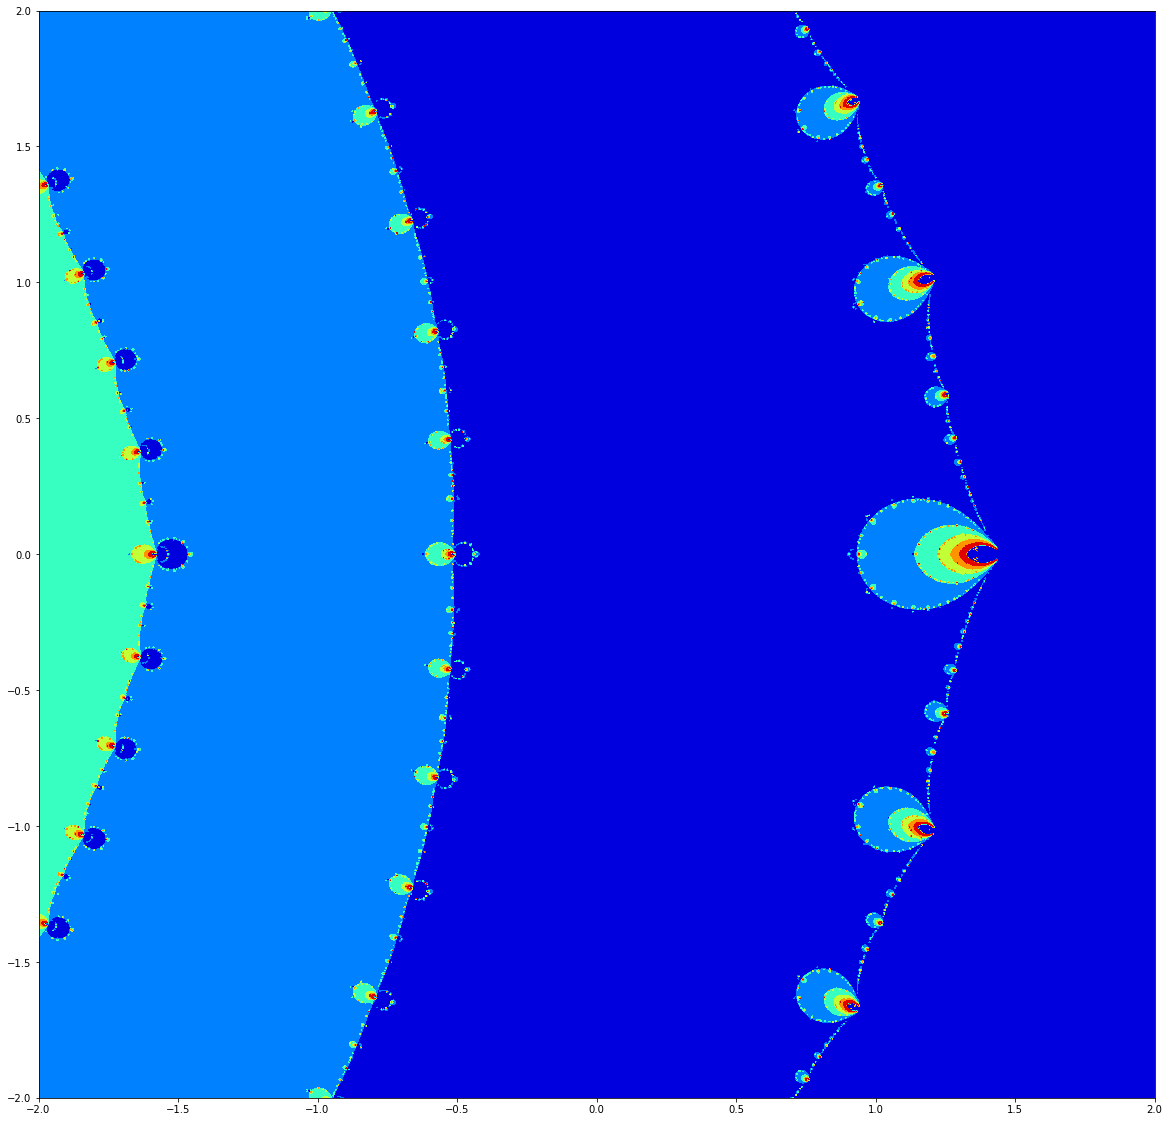

In [48]:
plt.figure(figsize=(20, 20))

plt.contourf(A2, B2, Z_color, len(raices), cmap='jet') # 30 is the amount of countours
#plt.scatter(raices.real, raices.imag, color="black")
plt.show()